In [13]:
import numpy as np
import pandas as pd
import os

# Importing custom metric functions from clac_metric.py
from clac_metric import get_metrics


In [56]:
os.chdir(r"C:\Users\admin\Documents\Courses\2023fall\E4040\finaL\LLM_DDA")
# Load the ground truth data
ground_truth = pd.read_csv('data\B-dataset\drug_dis.csv',header=None).values
# Define the directories containing the prediction files
result_dirs = ['result_LLM', 'result_origin'] 
base_dir = 'result'

# Assuming df is your DataFrame containing the ground truth
ground_truth = ground_truth.flatten()

# Initialize a dictionary to store results for each directory
all_results = {dir: [] for dir in result_dirs}

for model_dir in result_dirs:
    all_results[model_dir] = []
    for i in range(10):  # Assuming 10 files per folder
        prediction_file = f'{base_dir}\{model_dir}\prediction_{i}.npy'

        if os.path.exists(prediction_file):
            try:
                # Load prediction directly
                prediction = np.load(prediction_file).flatten()
            
                # Calculate metrics
                metrics = get_metrics(ground_truth, prediction)
                all_results[model_dir].append(metrics)
            except Exception as e:
                print(f'Error processing {prediction_file}: {e}')
        else:
            print(f'File not found: {prediction_file}')

# Check the final content of all_results after processing
for dir, results in all_results.items():
    print(f"Final data for {dir}: {results}")

Final data for result_LLM: [[0.5115356949987422, 0.8426539807293018, 0.49850022796534926, 0.8700811876017953, 0.5640204170286707, 0.9096499726212038, 0.44661822247065397], [0.5241727926023733, 0.8564649136234936, 0.508347327867233, 0.8762417475848864, 0.5588618592528236, 0.9172739143254286, 0.4662076463127378], [0.475421532321575, 0.7871796347220054, 0.48254348531356844, 0.871100695005657, 0.5249782797567333, 0.9158488128834786, 0.44645578388362966], [0.5192816353765906, 0.8516999266144697, 0.5017687074829932, 0.8747933010903756, 0.5507167680278019, 0.9166912373811831, 0.46081148621018675], [0.5198198992893266, 0.8540091679901674, 0.500129433083096, 0.86795514167423, 0.5769982623805386, 0.9055712340114851, 0.4413340532458363], [0.5206422750010766, 0.8541317105024439, 0.5033955250554006, 0.870441745098283, 0.5735773240660296, 0.9088215885317945, 0.44851598658231073], [0.5391739648092686, 0.8660045714901545, 0.5227550800086366, 0.8763349952132884, 0.591605125977411, 0.9131460342866771, 0

In [57]:
import pandas as pd
import scipy.stats as stats

def compute_statistics(df):
    # Calculate mean and standard deviation
    mean = df.mean()
    std = df.std()

    # Calculate the 95% Confidence Interval
    ci_lower = mean - 1.96 * std / np.sqrt(len(df))
    ci_upper = mean + 1.96 * std / np.sqrt(len(df))

    return pd.DataFrame({'Mean': mean, 'STD': std, '95% CI Lower': ci_lower, '95% CI Upper': ci_upper})


# Define the headers for the metrics
metric_headers = ["AUPR", "AUC", "F1 Score", "Accuracy", "Recall", "Specificity", "Precision"]
# Create DataFrames with specified headers
results_dfs = {dir: pd.DataFrame(all_results[dir], columns=metric_headers) for dir in all_results}

# Create a new folder named 'metrics_output' in the root directory
output_dir = r'result\metrics_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save individual metrics and aggregated statistics in the new folder
for dir in result_dirs:
    # Extract the model identifier from the directory name
    model_identifier = dir.split('_')[-1]

    # Define file names for saving CSVs using the model identifier
    individual_metrics_file = os.path.join(output_dir, f'{model_identifier}_individual_metrics.csv')
    aggregated_stats_file = os.path.join(output_dir, f'{model_identifier}_aggregated_statistics.csv')

    # Save individual fold metrics with headers
    results_dfs[dir].to_csv(individual_metrics_file, index=False)
    print(f"Saved individual metrics to {individual_metrics_file}")

    # Calculate and save aggregated statistics
    aggregated_stats = compute_statistics(results_dfs[dir])
    aggregated_stats.to_csv(aggregated_stats_file, index=False)
    print(f"Saved aggregated statistics to {aggregated_stats_file}")

# Display the results in a table format
for dir, stats_df in results_dfs.items():
    print(f"Results for {dir}:")
    display(stats_df)

Saved individual metrics to result\metrics_output\LLM_individual_metrics.csv
Saved aggregated statistics to result\metrics_output\LLM_aggregated_statistics.csv
Saved individual metrics to result\metrics_output\origin_individual_metrics.csv
Saved aggregated statistics to result\metrics_output\origin_aggregated_statistics.csv
Results for result_LLM:


,AUPR,AUC,F1 Score,Accuracy,Recall,Specificity,Precision
0,0.511536,0.842654,0.498500,0.870081,0.564020,0.909650,0.446618
1,0.524173,0.856465,0.508347,0.876242,0.558862,0.917274,0.466208
2,0.475422,0.787180,0.482543,0.871101,0.524978,0.915849,0.446456
3,0.519282,0.851700,0.501769,0.874793,0.550717,0.916691,0.460811
4,0.519820,0.854009,0.500129,0.867955,0.576998,0.905571,0.441334
5,0.520642,0.854132,0.503396,0.870442,0.573577,0.908822,0.448516
6,0.539174,0.866005,0.522755,0.876335,0.591605,0.913146,0.468260
7,0.516482,0.843689,0.500919,0.875048,0.547730,0.917365,0.461479
8,0.536496,0.864640,0.518895,0.877013,0.579333,0.915498,0.469876
9,0.542908,0.863032,0.521945,0.879338,0.575369,0.918636,0.477598


Results for result_origin:


,AUPR,AUC,F1 Score,Accuracy,Recall,Specificity,Precision
0,0.497160,0.856169,0.498799,0.872872,0.552563,0.914283,0.454570
1,0.496312,0.856718,0.497548,0.870075,0.561903,0.909917,0.446419
2,0.499284,0.856657,0.499626,0.867054,0.579768,0.904195,0.438949
3,0.497435,0.856375,0.496046,0.871642,0.551803,0.912992,0.450523
4,0.495725,0.856856,0.499041,0.873407,0.550771,0.915119,0.456193
5,0.496213,0.856654,0.499290,0.872947,0.553323,0.914269,0.454870
6,0.499697,0.856941,0.498358,0.872723,0.552237,0.914157,0.454058
7,0.493187,0.856232,0.497065,0.867912,0.570156,0.906407,0.440584
8,0.493894,0.857552,0.498223,0.865717,0.582320,0.902356,0.435351
9,0.496902,0.857009,0.498677,0.869298,0.567821,0.908274,0.444544


In [2]:
import os
os.chdir(r"C:\Users\admin\Documents\Courses\2023fall\E4040\finaL\LLM_DDA")

Metrics                          AUPR                   AUC  \
Origin Mean (SD)        0.497 (0.002)         0.857 (0.000)   
LLM Mean (SD)           0.521 (0.019)         0.848 (0.023)   
T-test (p-value)  3.972 (p=8.930e-04)  -1.154 (p=2.637e-01)   

Metrics                      F1 Score             Accuracy  \
Origin Mean (SD)        0.498 (0.001)        0.870 (0.003)   
LLM Mean (SD)           0.506 (0.012)        0.874 (0.004)   
T-test (p-value)  1.934 (p=6.898e-02)  2.378 (p=2.870e-02)   

Metrics                        Recall          Specificity  \
Origin Mean (SD)        0.562 (0.012)        0.910 (0.005)   
LLM Mean (SD)           0.564 (0.019)        0.914 (0.004)   
T-test (p-value)  0.284 (p=7.795e-01)  1.801 (p=8.850e-02)   

Metrics                     Precision  
Origin Mean (SD)        0.448 (0.008)  
LLM Mean (SD)           0.459 (0.012)  
T-test (p-value)  2.448 (p=2.485e-02)  


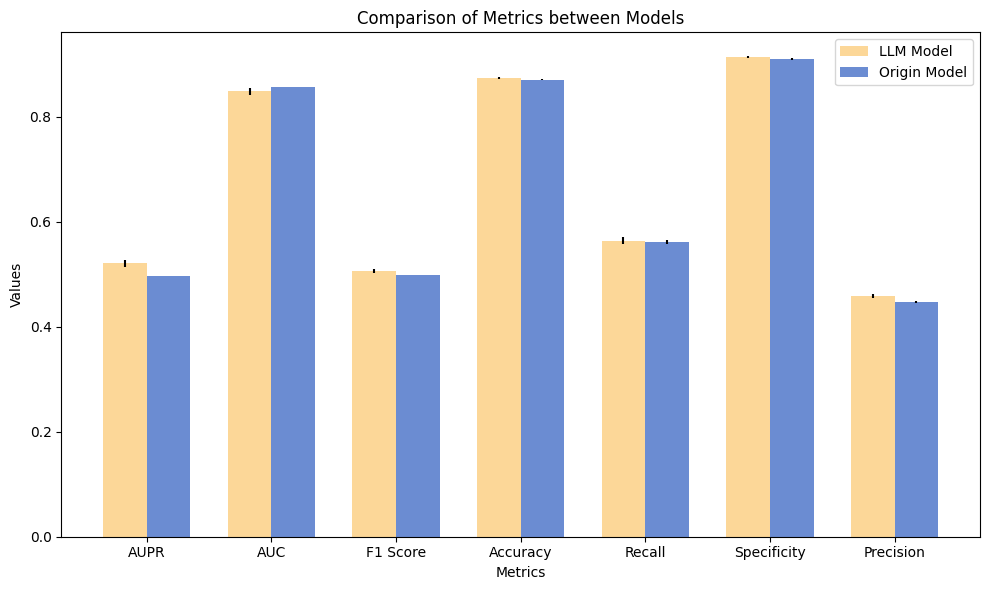

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


data_llm = pd.read_csv('result\metrics_output\LLM_individual_metrics.csv')
data_origin = pd.read_csv('result\metrics_output\origin_individual_metrics.csv')
mean_llm = data_llm.mean()
std_err_llm = data_llm.sem()  # Standard Error of the Mean
mean_origin = data_origin.mean()
std_err_origin = data_origin.sem()
std_dev_origin = data_origin.std()
std_dev_llm = data_llm.std()


# Perform T-tests
t_test_results = {metric: ttest_ind(data_llm[metric], data_origin[metric], nan_policy='omit') for metric in data_llm.columns}

# Prepare the table
table_data = {
    'Metrics': data_llm.columns,
    'Origin Mean (SD)': [f"{mean_origin[metric]:.3f} ({std_dev_origin[metric]:.3f})" for metric in data_llm.columns],
    'LLM Mean (SD)': [f"{mean_llm[metric]:.3f} ({std_dev_llm[metric]:.3f})" for metric in data_llm.columns],
    'T-test (p-value)': [f"{result.statistic:.3f} (p={result.pvalue:.3e})" if not np.isnan(result.statistic) else "NaN" for result in t_test_results.values()]
}

comparison_table = pd.DataFrame(table_data)
comparison_table_transposed = comparison_table.T
comparison_table_transposed.columns = comparison_table_transposed.iloc[0]
comparison_table_transposed = comparison_table_transposed.drop('Metrics')
# comparison_table_transposed.index.name = 'Model'
comparison_table_transposed.to_csv('result\metrics_output\comparison_table.csv', index=True)
print(comparison_table_transposed)

# Assuming mean_llm, std_err_llm, mean_origin, std_err_origin are already calculated
metrics = mean_llm.index  # Metric names

# Number of metrics
n_metrics = len(metrics)

# Set positions of the bars
bar_width = 0.35
index = np.arange(n_metrics)

# Colors for the models
color_llm = (252/255, 215/255, 152/255)  # Light color for LLM Model
color_origin = (107/255, 140/255, 210/255)  # Darker color for Origin Model

# Create the bar plot
plt.figure(figsize=(10, 6))

# Bars for the LLM model
plt.bar(index, mean_llm, bar_width, yerr=std_err_llm, color=color_llm, label='LLM Model')

# Bars for the Origin model
plt.bar(index + bar_width, mean_origin, bar_width, yerr=std_err_origin, color=color_origin, label='Origin Model')

# Add labels, title, etc.
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics between Models')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# Show plot
plt.tight_layout()
plt.savefig('result\metrics_output\metrics_comparison.png', dpi=1200)
plt.show()


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from scipy import stats, interpolate

# Function to calculate mean and 95% CI
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

def interpolate_curve(measurements, x_grid):
    interpolated = []
    for x, y in measurements:
        f = interpolate.interp1d(x, y, kind='nearest', fill_value='extrapolate')
        interpolated.append(f(x_grid))
    return np.array(interpolated)


# Initialize lists to store metrics and curves
auc_llm_list, aupr_llm_list = [], []
auc_origin_list, aupr_origin_list = [], []
tpr_llm_list, precision_llm_list = [], []
tpr_origin_list, precision_origin_list = [], []

# Load labels
label = pd.read_csv('data\B-dataset\drug_dis.csv', header=None).values.flatten()
# Iterate over prediction files
for i in range(10):
    pred = np.load(rf'result\result_LLM\prediction_{i}.npy').flatten()
    origin = np.load(rf'result\result_origin\prediction_{i}.npy').flatten()

    # Calculate AUC and AUPR for LLM
    fpr_llm, tpr_llm, _ = roc_curve(label, pred)
    precision_llm, recall_llm, _ = precision_recall_curve(label, pred)
    auc_llm_list.append(auc(fpr_llm, tpr_llm))
    aupr_llm_list.append(auc(recall_llm, precision_llm))
    tpr_llm_list.append((fpr_llm, tpr_llm))
    precision_llm_list.append((recall_llm, precision_llm))

    # Calculate AUC and AUPR for Origin
    fpr_origin, tpr_origin, _ = roc_curve(label, origin)
    precision_origin, recall_origin, _ = precision_recall_curve(label, origin)
    auc_origin_list.append(auc(fpr_origin, tpr_origin))
    aupr_origin_list.append(auc(recall_origin, precision_origin))
    tpr_origin_list.append((fpr_origin, tpr_origin))
    precision_origin_list.append((recall_origin, precision_origin))

# Define a common grid for FPR (for ROC) and Recall (for Precision-Recall)
common_fpr = np.linspace(0, 1, 100)
common_recall = np.linspace(0, 1, 100)

# Interpolate TPR and Precision to the common grid
interp_tpr_llm = interpolate_curve(tpr_llm_list, common_fpr)
interp_precision_llm = interpolate_curve(precision_llm_list, common_recall)
interp_tpr_origin = interpolate_curve(tpr_origin_list, common_fpr)
interp_precision_origin = interpolate_curve(precision_origin_list, common_recall)

# Calculate mean TPR and Precision across the common grid
mean_tpr_llm = np.mean(interp_tpr_llm, axis=0)
mean_precision_llm = np.mean(interp_precision_llm, axis=0)
mean_tpr_origin = np.mean(interp_tpr_origin, axis=0)
mean_precision_origin = np.mean(interp_precision_origin, axis=0)

# Calculate 95% CI for TPR and Precision
ci_tpr_llm = stats.sem(interp_tpr_llm, axis=0) * stats.t.ppf((1 + 0.95) / 2., len(interp_tpr_llm) - 1)
ci_precision_llm = stats.sem(interp_precision_llm, axis=0) * stats.t.ppf((1 + 0.95) / 2., len(interp_precision_llm) - 1)
ci_tpr_origin = stats.sem(interp_tpr_origin, axis=0) * stats.t.ppf((1 + 0.95) / 2., len(interp_tpr_origin) - 1)
ci_precision_origin = stats.sem(interp_precision_origin, axis=0) * stats.t.ppf((1 + 0.95) / 2., len(interp_precision_origin) - 1)

# Create a figure with two subplots
plt.figure(figsize=(10, 4), dpi=1200)

# Subplot 1: ROC Curve
ax1 = plt.subplot(1, 2, 1)
ax1.plot(common_fpr, mean_tpr_llm, label='Ours(LAGCN-LLM) AUC=0.848', color='#FC9878', linewidth=1.5)
ax1.fill_between(common_fpr, mean_tpr_llm - ci_tpr_llm, mean_tpr_llm + ci_tpr_llm, color='#FDF0D8', alpha=0.7)  # Increased alpha
ax1.plot(common_fpr, mean_tpr_origin, label='Origin(LAGCN) AUC=0.857', color='#72D175', linewidth=1)
ax1.fill_between(common_fpr, mean_tpr_origin - ci_tpr_origin, mean_tpr_origin + ci_tpr_origin, color='#D8F3EA', alpha=0.7)  # Increased alpha
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=10)
ax1.set_ylabel('True Positive Rate', fontsize=10)
ax1.set_title('ROC Curve', fontsize=10)
ax1.legend(loc="lower right", fontsize=10)

# Subplot 2: Precision-Recall Curve
ax2 = plt.subplot(1, 2, 2)
ax2.plot(common_recall, mean_precision_llm, label='Ours(LAGCN-LLM) AUPR=0.521', color='#FC9878', linewidth=1.5)
ax2.fill_between(common_recall, mean_precision_llm - ci_precision_llm, mean_precision_llm + ci_precision_llm, color='#FDF0D8', alpha=0.7)  # Increased alpha
ax2.plot(common_recall, mean_precision_origin, label='Origin(LAGCN) AUPR=0.497', color='#72D175', linewidth=1)
ax2.fill_between(common_recall, mean_precision_origin - ci_precision_origin, mean_precision_origin + ci_precision_origin, color='#D8F3EA', alpha=0.7)  # Increased alpha
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall', fontsize=10)
ax2.set_ylabel('Precision', fontsize=10)
ax2.set_title('Precision-Recall Curve', fontsize=10)
ax2.legend(loc="lower left", fontsize=10)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('roc_pr_curves.png', dpi=1200)
plt.show()